In [1]:


!pip install ipython
!pip install seaborn



In [2]:
import pylab as plt
import seaborn as sns

In [3]:
import warnings

# Warnings ignore
warnings.simplefilter('ignore')

In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

import numpy as np

In [5]:

import zipfile

zf=zipfile.ZipFile('attacks.csv.zip')

ctr=pd.read_csv(zf.open('attacks.csv'), encoding="latin1", nrows=1e5)

ctr.head()


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [6]:
ctr.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6300.0,1927.272381,281.116308,0.0,1942.0,1977.0,2005.0,2018.0
original order,6309.0,3155.999683,1821.396206,2.0,1579.0,3156.0,4733.0,6310.0


In [7]:
ctr.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

In [8]:
ctr["Age"].describe()

count     3471
unique     157
top         17
freq       154
Name: Age, dtype: object

In [9]:
ctr.isnull().sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [10]:
sub = ctr[ctr.isna().all(axis=1)]

sub

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
sharks=ctr.copy()
sharks.tail()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


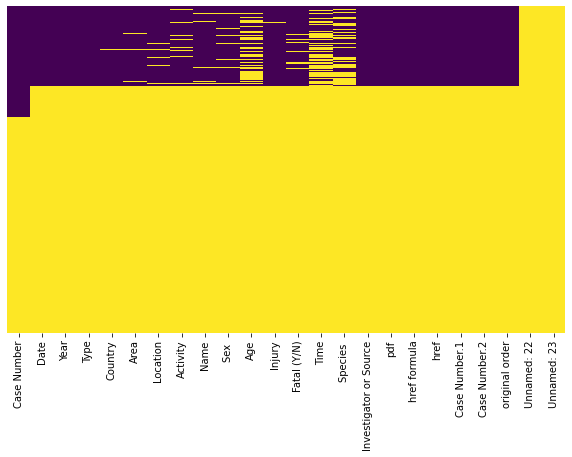

In [12]:
plt.figure(figsize=(10, 6))

sns.heatmap(sharks.isna(),  # mapa de calor
            yticklabels=False,
            cmap='viridis',
            cbar=False);

In [13]:
sharks1= sharks[sharks.isna().all(axis=1)]

sharks1

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
cols=sharks.columns.drop(["Case Number", "original order"])

cols

subset_cols=sharks.columns.drop(["Unnamed: 22", "Unnamed: 23"])

def_sub=sharks[subset_cols][sharks[cols].notnull().any(axis=1)]

def_sub.tail(15)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
6287,ND.0015,Before 1917,0.0,Unprovoked,FIJI,Moala Island,NaN,Wreck of large double sailing canoe,20 Fijians,NaN,NaN,"FATAL, 18 people were killed by sharks, 2 sur...",Y,NaN,NaN,"Fijian Society papers presented April 17, 1918...",ND-0015-FijianCanoe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0015,ND.0015,16.0
6288,ND.0014,Before 17-Jul-1916,0.0,Unprovoked,USA,North Carolina,Somewhere between Hatteras and Beaufort,Swimming,"""youthful male""",M,NaN,"""Lost leg""",N,NaN,NaN,"C. Creswell, GSAF; Wilmington Star, 7/17/1916",ND-0014-pre1916-NorthCarolina.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0014,ND.0014,15.0
6289,ND.0013,No date (3 days after preceding incident) & pr...,0.0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Fishing,a native fisherman,M,NaN,"FATAL, body not recovered but shark was caught...",Y,NaN,NaN,"Rural New Yorker, 7/19/1913",ND-0013-Durban-native-fisherman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0013,ND.0013,14.0
6290,ND.0012,Before 19-Jul-1913,0.0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Wading,a young Scotsman,M,NaN,"FATAL, leg stripped of flesh",Y,NaN,NaN,"Rural New Yorker, 7/19/1913",ND-0012-Durban-Scotsman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0012,ND.0012,13.0
6291,ND.0011,Before 1911,0.0,Unprovoked,ASIA?,NaN,NaN,Swimming,Mr. Masury,M,NaN,Foot severed,N,NaN,NaN,"Ref. J. T. Dubois in N.Y. Sun, 3/19/1911",ND-0011-Masury.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0011,ND.0011,12.0
6292,ND.0010,Circa 1862,0.0,Unprovoked,USA,Hawaii,Puna,NaN,"A ""chiefess""",F,NaN,Ankle bitten,N,NaN,NaN,Captain W. Young,ND-0010-Puna Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0010,ND.0010,11.0
6293,ND.0009,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,boy,M,NaN,"FATAL, knocked overboard by tail of shark & ca...",Y,NaN,Blue pointer,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0009-boy-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0009,ND.0009,10.0
6294,ND.0008,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,fisherman,M,NaN,FATAL,Y,NaN,Blue pointer,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0008-Fisherman2-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0008,ND.0008,9.0
6295,ND.0007,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,fisherman,M,NaN,FATAL,Y,NaN,Blue pointers,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0007 - Fisherman-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0007,ND.0007,8.0
6296,ND.0006,Before 1906,0.0,Unprovoked,AUSTRALIA,New South Wales,,Swimming,Arab boy,M,NaN,FATAL,Y,NaN,Said to involve a grey nurse shark that leapt ...,"L. Becke in New York Sun, 9/9/1906; L. Schultz...",ND-0006-ArabBoy-Prymount.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0006,ND.0006,7.0


In [15]:
year=def_sub[def_sub.Year.isnull()]

year

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
187,2017.01.08.R,Reported 08-Jan-2017,NaN,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,Kerry Daniel,M,35,"No attack, shark made a threat display",NaN,NaN,Bull shark,Liquid Vision 1/8/2017,2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.08.R,2017.01.08.R,6116.0
6079,1836.08.19.R,Reported 19-Aug-1836,NaN,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,224.0


In [16]:
def_sub.Year[187]=2017
def_sub.Year[6079]=1836

In [17]:
def_sub.Year[187]

2017.0

In [18]:
def_sub.Year=pd.to_datetime(def_sub.Year, format="%Y", errors="coerce")

key_word=["[ ]*No date, Before[ ]*","[ ]*few year before[ ]* ","[ ]*Before[ ]*","[ ]*Reported[ ]*","[ ]*Circa[ ]*","[ ]*Late[ ]*","[\´]?[s]$","[?]$"]

for reg in key_word:
          
 def_sub.Date=def_sub.Date.str.replace(reg,"", regex=True)

#def_sub.Date.replace(key_word, "", regex=True)



def_sub.Date=pd.to_datetime(def_sub.Date, errors="coerce")

In [19]:
def_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Case Number             6301 non-null   object        
 1   Date                    6117 non-null   datetime64[ns]
 2   Year                    6164 non-null   datetime64[ns]
 3   Type                    6298 non-null   object        
 4   Country                 6252 non-null   object        
 5   Area                    5847 non-null   object        
 6   Location                5762 non-null   object        
 7   Activity                5758 non-null   object        
 8   Name                    6092 non-null   object        
 9   Sex                     5737 non-null   object        
 10  Age                     3471 non-null   object        
 11  Injury                  6274 non-null   object        
 12  Fatal (Y/N)             5763 non-null   object  

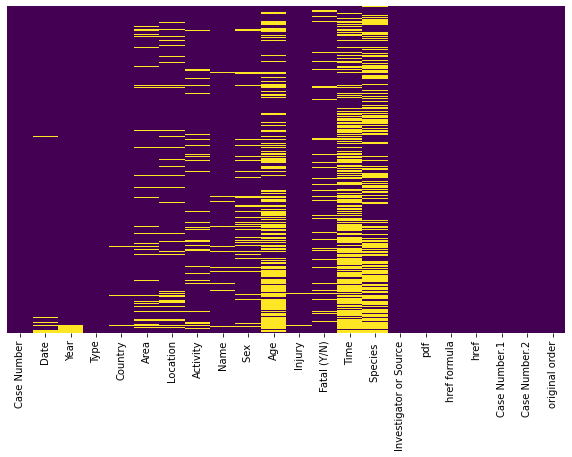

In [20]:
plt.figure(figsize=(10, 6))

sns.heatmap(def_sub.isna(),  # mapa de calor
            yticklabels=False,
            cmap='viridis',
            cbar=False);

In [21]:
def_sub.Date.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
6297    False
6298    False
6299     True
6300     True
6301     True
Name: Date, Length: 6302, dtype: bool

In [22]:
def_sub.Date.isnull().value_counts()

False    6117
True      185
Name: Date, dtype: int64

In [23]:
def_sub.Date.fillna("unknown",inplace=True)

In [24]:
def_sub.Date.isnull().value_counts()

False    6302
Name: Date, dtype: int64

In [25]:
#####YEARRRRRR#####

def_sub.Year.isnull().value_counts()

False    6164
True      138
Name: Year, dtype: int64

In [26]:
def_sub.Year.fillna("unknown",inplace=True)

In [27]:
def_sub.Country.isnull().value_counts()

False    6252
True       50
Name: Country, dtype: int64

In [28]:
def_sub.Country.fillna("unknown",inplace=True)

In [29]:
def_sub["Country"].value_counts()

USA                      2229
AUSTRALIA                1338
SOUTH AFRICA              579
PAPUA NEW GUINEA          134
NEW ZEALAND               128
                         ... 
THE BALKANS                 1
NORTH ATLANTIC OCEAN        1
MAYOTTE                     1
GABON                       1
CEYLON (SRI LANKA)          1
Name: Country, Length: 213, dtype: int64

In [30]:
def_sub.Country.unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', 'unknown', 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, British overseas territory', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'Fiji', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 

In [31]:
def_sub.Area.fillna("unknown", inplace=True)

In [32]:
def_sub.Area.isnull().value_counts()

False    6302
Name: Area, dtype: int64

In [33]:
####INJURYYYY

def_sub.Injury.isnull().value_counts()
    

False    6274
True       28
Name: Injury, dtype: int64

In [34]:
def_sub.Injury.fillna("unknown", inplace=True)

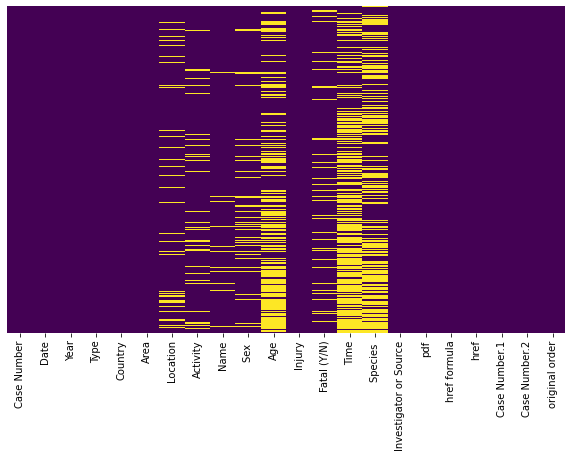

In [35]:
plt.figure(figsize=(10, 6))

sns.heatmap(def_sub.isna(),  # mapa de calor
            yticklabels=False,
            cmap='viridis',
            cbar=False);

In [36]:
#LOCATION##
def_sub.Location.isnull().value_counts()


False    5762
True      540
Name: Location, dtype: int64

In [37]:
def_sub.Location.unique()

array(['Oceanside, San Diego County', 'St. Simon Island, Glynn County',
       'Habush, Oahu', ..., 'Ocracoke Inlet', 'Panama Bay 8ºN, 79ºW',
       'Below the English fort, Trincomalee'], dtype=object)

In [38]:
def_sub.Location.fillna("unknown", inplace=True)

In [39]:
#ACTIVITY#
def_sub.Activity.isnull().value_counts()



False    5758
True      544
Name: Activity, dtype: int64

In [40]:
def_sub.Activity.fillna("unknown", inplace=True)


In [41]:
#nameee#
def_sub.Name.isnull().value_counts()


False    6092
True      210
Name: Name, dtype: int64

In [42]:
def_sub.Name.fillna("unknown", inplace=True)

In [43]:
def_sub.rename(columns={"Sex ":"Sex"})

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,2018-06-25 00:00:00,2018-01-01 00:00:00,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,2018-06-18 00:00:00,2018-01-01 00:00:00,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,2018-06-09 00:00:00,2018-01-01 00:00:00,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,2018-06-08 00:00:00,2018-01-01 00:00:00,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,2018-06-04 00:00:00,2018-01-01 00:00:00,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,1903-01-01 00:00:00,unknown,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0
6298,ND.0004,1903-01-01 00:00:00,unknown,Unprovoked,AUSTRALIA,Western Australia,unknown,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0
6299,ND.0003,unknown,unknown,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0
6300,ND.0002,unknown,unknown,Unprovoked,PANAMA,unknown,"Panama Bay 8ºN, 79ºW",unknown,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0


In [44]:
def_sub.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

In [45]:
def_sub.Sex=def_sub['Sex ']

def_sub.Sex.unique()

array(['F', 'M', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [46]:
def_sub.Sex.fillna("unkown", inplace=True)

In [47]:
key_sex=["[ ]*N[ ]*","[ ]*lli[ ]*","[ ]*.[ ]*"] 

for regi in key_sex:
          
 #def_sub.Sex=def_sub.Sex.str.replace(regi,"Unkown", regex=True)



IndentationError: expected an indented block (Temp/ipykernel_15780/307783953.py, line 6)

In [ ]:
def_sub.Sex.value_counts()

In [ ]:
def_sub.Sex.replace("M ","M", inplace=True)
def_sub.Sex.replace("N","unkown", inplace=True)
def_sub.Sex.replace("lli","unkown", inplace=True)
def_sub.Sex.replace(".","unkown", inplace=True)

In [ ]:
plt.figure(figsize=(10, 6))

sns.heatmap(def_sub.isna(),  # mapa de calor
            yticklabels=False,
            cmap='viridis',
            cbar=False);

In [ ]:
def_sub.Age.unique()

In [ ]:
def_sub.Age.replace("10 or 12","11", inplace=True)
def_sub.Age.replace("13 or 14","13", inplace=True)
def_sub.Age.replace("33 or 37","35", inplace=True)
def_sub.Age.replace("18 or 20","19", inplace=True)
def_sub.Age.replace("7 or 8","7", inplace=True)

def_sub.Age.replace("31 or 33","32", inplace=True)
def_sub.Age.replace("9 or 10","9", inplace=True)
def_sub.Age.replace("13 or 18","unkown", inplace=True)
def_sub.Age.replace("25 or 28","26", inplace=True)
def_sub.Age.replace("18 to 22","20", inplace=True)
def_sub.Age.replace("? & 19","19", inplace=True)
def_sub.Age.replace("25 to 35","30", inplace=True)
def_sub.Age.replace(">50","50", inplace=True)
def_sub.Age.replace("21 or 26","23", inplace=True)
def_sub.Age.replace("Ca. 33","33", inplace=True)
def_sub.Age.replace("mid-20s","25", inplace=True)
def_sub.Age.replace("20?","20", inplace=True)

In [ ]:
def_sub.Age.replace("60´s","60", inplace=True)
def_sub.Age.replace("16 to 18","17", inplace=True)
def_sub.Age.replace("mid-30s","35", inplace=True)
def_sub.Age.replace("30 or 36","33", inplace=True)
def_sub.Age.replace("6½","6", inplace=True)
def_sub.Age.replace("2½","2", inplace=True)

def_sub.Age.replace('unkown',"unknown", inplace=True)
def_sub.Age.replace('8 or 10',"9", inplace=True)
def_sub.Age.replace('12 or 13',"12", inplace=True)





In [ ]:
key_age=["[ ]*Teen[ ]*","[ ]*teen[ ]*","[ ]*F[ ]*","[ ]*X[ ]*","[ ]*18 months[ ]*","[ ]*Teens[ ]*","[ ]*Elderly[ ]*","[ ]*adult[ ]*","[ ]*(adult)[ ]*","[ ]*middle-age[ ]*","[ ]*MAKE LINE GREEN[ ]*","[ ]*young[ ]*","[ ]*young[ ]*","[ ]*A.M.[ ]*"]

for regi in key_age:
          
 def_sub.Age=def_sub.Age.str.replace(regi,"unkown", regex=True)

key_age2=["[\´]?[s]$","[?]$", "[ ]*Both [ ]*"]

for regg in key_age2:
    def_sub.Age=def_sub.Age.str.replace(regg,"", regex=True)

In [54]:
def_sub.Age.fillna("unknown", inplace=True)

In [56]:
def_sub.Age.isnull().value_counts()

False    6302
Name: Age, dtype: int64

In [ ]:
#FATAL#

#def_sub.Fatal(Y/N).isnull().value_counts()

def_sub['Fatal (Y/N)'].unique()

In [ ]:
def_sub['Fatal (Y/N)'].value_counts()

In [ ]:
def_sub['Fatal (Y/N)'].replace(' N',"N", inplace=True)
def_sub['Fatal (Y/N)'].replace('N ',"N", inplace=True)
def_sub['Fatal (Y/N)'].replace('M',"N", inplace=True)
def_sub['Fatal (Y/N)'].replace('y',"Y", inplace=True)
def_sub['Fatal (Y/N)'].replace('UNKOWN',"UNKNOWN", inplace=True)








In [ ]:
def_sub['Fatal (Y/N)'].isnull().value_counts()

In [52]:
def_sub['Fatal (Y/N)'].fillna("unkown", inplace=True)
def_sub['Fatal (Y/N)'].replace("unkown","unknown", inplace=True)



In [ ]:
####TIME

def_sub.Time.value_counts()

In [ ]:
def_sub.Time.unique()

In [ ]:
key_time=["[ ]*After[ ]*","[ ]*Ship aban-doned at[ ]*","[ ]*Before[ ]*","[ ]*(Sunset)[ ]*","[ ]*Prior to[ ]*","[ ]*<[ ]*","[ ]*>[ ]*","[ ]*Shortly before[ ]*","[ ]*Shortly after[ ]*","[ ]*Sometime between[ ]*","[ ]*-[ ]*","[ ]*, Dusk[ ]*","[ ]*()[ ]*" ]
for ret in key_time:
          
 def_sub.Time=def_sub.Time.str.replace(ret,"", regex=True)

key_j=["[ ]*j[ ]*"]

for rej in key_j:
    def_sub.Time=def_sub.Time.str.replace(rej,"h", regex=True)

In [ ]:
def_sub.Time.replace("14h0015h00","14h30", inplace=True)
def_sub.Time.replace('Late afternoon',"16h30", inplace=True)
def_sub.Time.replace('Midday',"12h00", inplace=True)
def_sub.Time.replace('Midnight',"0h00", inplace=True)
def_sub.Time.replace('10h4511h15',"11h00", inplace=True)
def_sub.Time.replace("07h0008h00","7h30", inplace=True)
def_sub.Time.replace("18h1518h30","18h30", inplace=True)
def_sub.Time.replace("Just before noon","12h00", inplace=True)
def_sub.Time.replace("09h0009h30","9h30", inplace=True)
def_sub.Time.replace("10h0011h00","10h30", inplace=True)
def_sub.Time.replace("Just before ","", inplace=True)
def_sub.Time.replace("Between 05h00 and 08h00","6h30", inplace=True)
def_sub.Time.replace("Just after ","", inplace=True)
def_sub.Time.replace("Midday.","12h", inplace=True)
def_sub.Time.replace("midnight","0h00", inplace=True)
def_sub.Time.replace("03h4504h00","4h00", inplace=True)
def_sub.Time.replace("11h00 / 11h30","11h15", inplace=True)
def_sub.Time.replace("6j00","6h00", inplace=True)
def_sub.Time.replace("06h0007h00","6h30", inplace=True)
def_sub.Time.replace("17h0018h00","17h30", inplace=True)
def_sub.Time.replace("08h00 / 09h30","8h45", inplace=True)
def_sub.Time.replace("Between 11h00 & 12h00","11h30", inplace=True)
def_sub.Time.replace("18h15 to 21h30","20h30", inplace=True)

def_sub.Time.replace("09h30 / 10h00","9h45", inplace=True)
def_sub.Time.replace("12h00 to 14h00","13h00", inplace=True)
def_sub.Time.replace("11h01time of ship sinking","11h01", inplace=True)
def_sub.Time.replace("10h30 or 13h30","11h30", inplace=True)
def_sub.Time.replace('"',"", inplace=True)
def_sub.Time.replace("06h00 & 08hoo","7h00", inplace=True)
def_sub.Time.replace("09h30 / 10h00","9h45", inplace=True)

def_sub.Time.replace("09h0010h00","9h30", inplace=True)



def_sub.Time.replace("19h0020h00","19h30", inplace=True)
def_sub.Time.replace("06j00","6h00", inplace=True)





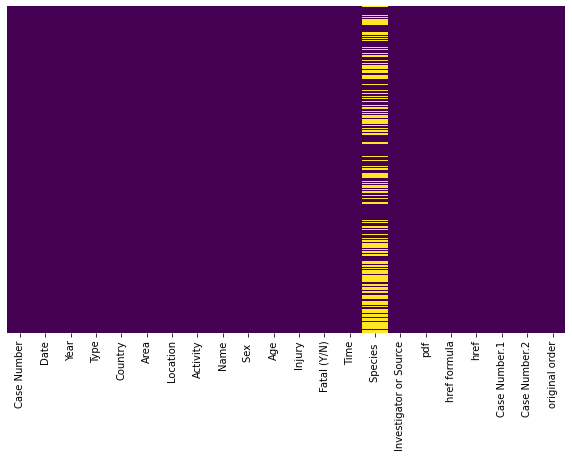

In [57]:
plt.figure(figsize=(10, 6))

sns.heatmap(def_sub.isna(),  # mapa de calor
            yticklabels=False,
            cmap='viridis',
            cbar=False);

In [50]:
def_sub.Time.isnull().value_counts()

False    6302
Name: Time, dtype: int64

In [49]:
def_sub.Time.fillna("unknown", inplace=True)


In [67]:
def_sub.columns=def_sub.columns.str.replace(" ","")
def_sub.columns

Index(['casenumber', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal(y/n)', 'time',
       'species', 'investigatororsource', 'pdf', 'hrefformula', 'href',
       'casenumber.1', 'casenumber.2', 'originalorder'],
      dtype='object')

In [64]:
def_sub.Species.isnull().value_counts()

False    3464
True     2838
Name: Species, dtype: int64

# SPECIES

In [65]:
def_sub.Species.fillna("unknown",inplace=True)

In [66]:
def_sub.columns=def_sub.columns.str.lower()